<a href="https://colab.research.google.com/github/KsibiI/DM-ML-Assignment2/blob/main/KsibiIm%C3%A8ne_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Assignment 2

> Topics Covered: Classification (week 6 to week 7)

**Due: Sunday November 21, 11.59pm**


To complete the assignment you have to do ***both***:

1. Complete the exercises and [submit your Python notebook](https://moodle.unil.ch/mod/assign/view.php?id=1182268)
2. Answer the questions to the [quiz on Moodle](https://moodle.unil.ch/mod/quiz/view.php?id=1182280)
>Note: You can only complete the quiz *one time*. Have your notebook ready with your solutions for answering the quiz. 

The answers to the quiz should be supported by your code in the notebook. If they are not you will not receive points for them.

**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** This is individual work. We will run your code and check for similarities.

You can post your questions in [slack channel #assignment_questions](https://app.slack.com/client/T02C4KVGVMX/C02BBA2TFQF).


If there is need for further clarifications on the questions, after the assignment is released, we will update this file on GitHub, so make sure you check the git repo for updates.

To get started, run the first few cells to load the dataset and then check out the questions.

Good luck!

In [ ]:
# Import required packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set_style("whitegrid")

**Important!**

**For all the questions below, fix the seed of random generators to 72.**

In [ ]:
np.random.seed = 72

# Classification

For the first part we use employee retention data from [Kaggle](https://www.kaggle.com/pankeshpatel/hrcommasep). The dataset contains HR information on a company's employees such as:
* satisfaction level, ranges from 0 to 1
* score of the last evaluation they received, ranges from 0 to 1
* number of projects in which the employee is involved 
* average number of hours worked per month
* years spent with the company
* whether they experienced a work accident (1 if yes, 0 if no)
* whether they left thier job (1) or stayed with the company (0)
* whether they received a promotion in the last 5 years (1 if yes, 0 if no)
* the department in which they work
* whether their salary was low, medium or high.

### _Your task is to build a model that predicts whether an employee stays (0) or leaves the company (1)._

### 1. Load the data

In [ ]:
# Load data
df=pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/data/HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


#### 1.1. How many rows and columns does the dataset have?

In [ ]:
#your code here
df.shape


(14999, 10)

#### 1.2. Looking at the `left` column, which shows 1 if an employee left their job and 0 if they stayed, calculate and show the frequency of each class in the total dataset. 

In [ ]:
# your code here
frequency_df = df.groupby('left').count()
frequency_df


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,promotion_last_5years,department,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571



### 2. Encode categorical variables


For the following categorical features:
- encode `salary` with two different encoders: a label encoder, an ordinal encoder (keep both), and
- `department` with one hot encoding. 



In [ ]:
# import some additional packages
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler

#### 2.1. Use a LabelEncoder to encode `salary` as `le_salary`.

In [ ]:
# your code here
le=LabelEncoder()
le_salary = pd.Series(LabelEncoder().fit_transform(df["salary"]), name="le_salary")
le_salary

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: le_salary, Length: 14999, dtype: int64

#### 2.2. Use an Ordinal Encoder to encode `salary` as `oe_salary`. For the ordinal encoding you should set your own dictionary such that `low salary` corresponds to 0, 1 to medium and 2 to high. 

In [ ]:
# your code here
oe=OrdinalEncoder()
oe.set_params(categories= [['low', 'medium', 'high']])
oe_salary= oe.fit_transform(df[['salary']])

oe_salary = pd.DataFrame(oe_salary).astype('int')
oe_salary.value_counts()

0    7316
1    6446
2    1237
dtype: int64

#### 2.3. Encode the `department` column with one hot encoding.

In [ ]:
#your code here
one_hot = OneHotEncoder()
cat_to_onehot = one_hot.fit_transform(df[["department"]]).toarray()
cat_to_onehot = pd.DataFrame(cat_to_onehot, columns=one_hot.categories_)
cat_to_onehot


,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### 2.4. Now concatenate all the features (`department` one hot-encoded, and the two versions of encoded `salary`) to the initial dataframe. You can use the `pd.concat` function. 
> Hint: You should have a total of 22 features in the concatenated dataset.

In [ ]:
# your code here
df = pd.concat([df, cat_to_onehot, le_salary, oe_salary], axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary,"(IT,)","(RandD,)","(accounting,)","(hr,)","(management,)","(marketing,)","(product_mng,)","(sales,)","(support,)","(technical,)",le_salary,0
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0


#### 2.5. Create a new column, `eval_spent` equal to the product of two of the existing columns: the `evaluation score` and the `time spent` with the company.

In [ ]:
# your code here
df['eval_spent'] = df['last_evaluation'] * df['time_spent_company']
df['eval_spent']


0        1.59
1        5.16
2        3.52
3        4.35
4        1.56
         ... 
14994    1.71
14995    1.44
14996    1.59
14997    3.84
14998    1.56
Name: eval_spent, Length: 14999, dtype: float64

### 3. Train a Logistic Regression model with Cross Validation (with Label-Encoded Salary)

For this section, train a logistic regression model with cross-validation on the employee retention dataset. Use all of the dependent variable features available from the concatenated dataset, but use only one encoded `salary` column at a time. 

Your dependent variable (y) is the column named `left`.

You can then compare your logistic regression results when using the label-encoded salary and when using the ordinal-encoded salary.

#### 3.1. Set the y and X variables. This time using `le_salary`.

> Hint: X should have a total of 19 features, namely: 'satisfaction_level', 'last_evaluation',            'number_project', 'average_monthly_hours',           'time_spent_company',         'work_accident',       'promotion_last_5years',                 ('IT',),                   ('RandD',),         ('accounting',), ('hr',),         ('management',),  ('marketing',), ('product_mng',), ('sales',),            ('support',), ('technical',), 'le_salary', 'eval_spent'.

In [ ]:
# your code here
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spent_company', 'work_accident', 'promotion_last_5years', ('IT',), ('RandD',), ('accounting',), ('hr',), ('management',), ('marketing',), ('product_mng',), ('sales',), ('support',), ('technical',), 'le_salary', 'eval_spent']].values
y = df["left"].values

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


#### 3.2. Train/test splitting: Now split the data into 80% training and 20% test set. Remember to set the random seed to 72.


In [ ]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

#### 3.3. What is the base rate of the classification problem (whether an employee stays or leaves) ?
> Hint: calculate the frequency of the most common class on the test set for y

In [ ]:
# your code here
LR_cv = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
LR_cv.fit(X_train, y_train)

y_pred = LR_cv.predict(X_test)

def evaluate(true, pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

evaluate(y_test, y_pred)


CONFUSION MATRIX:
[[2126  162]
 [ 432  280]]
ACCURACY SCORE:
0.8020
CLASSIFICATION REPORT:
	Precision: 0.6335
	Recall: 0.3933
	F1_Score: 0.4853


In [ ]:
# store for comparing it later
accuracy1=LR_cv.score(X_test, y_test)

#### 3.4. Finally, train a Logistic Regression model with cross validation. Use the following parameters for Logistic Regression.

`LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)`

In [ ]:
# your code here
LR_cv = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)

#### 3.5. What is the test accuracy? What is the train accuracy?

In [ ]:
# your code here
LR = LogisticRegression()
LR.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
LR.score(X_train, y_train)

0.7663971997666472

In [ ]:
LR.score(X_test, y_test)

0.7686666666666667

In [ ]:
# storing the first test-accuracy score for comparing it later
TestAccu=LR.score(X_test, y_test)

#### 3.6. Calculate the precision and recall on the test set.

In [ ]:
# your code here
LR_cv = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
LR_cv.fit(X_test, y_test)
y_pred = LR_cv.predict(X_test)

def evaluate(true, pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[2115  173]
 [ 340  372]]
ACCURACY SCORE:
0.8290
CLASSIFICATION REPORT:
	Precision: 0.6826
	Recall: 0.5225
	F1_Score: 0.5919


#### 3.7. Plot the confusion matrix

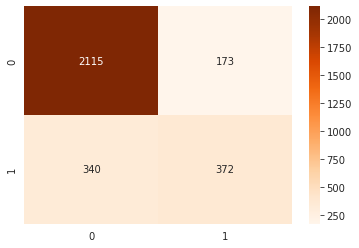

In [ ]:
# your code here
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.4g');

### 4. Logistic Regression with Cross Validation (with Ordinal-Encoded Salary)
#### 4.1. One more time, set the y and X variables, this time using `oe_salary` instead of `le_salary`.

> Hint: X shoud contain the following 19 features 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'eval_spent','work_accident',
       'promotion_last_5years', ('IT',), ('RandD',), ('accounting',),
       ('hr',), ('management',), ('marketing',), ('product_mng',),
       ('sales',), ('support',), ('technical',), 'oe_salary'.

In [ ]:
# your code here

X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spent_company', 'eval_spent','work_accident', 'promotion_last_5years', ('IT',), ('RandD',), ('accounting',), ('hr',), ('management',), ('marketing',), ('product_mng',), ('sales',), ('support',), ('technical',), 0]].values
y = df["left"].values


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)



#### 4.2. Train/test splitting¶: Now split the data into 80% training and 20% test set. Remember to set the random seed to 72.


In [ ]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

#### 4.3. Finally, train a Logistic Regression model with cross validation. Use the same parameters as before for Logistic RegressionCV. These are copied again below.

`LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)`

In [ ]:
# your code here
LR_cv = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)
LR_cv.fit(X_train, y_train)

y_pred = LR_cv.predict(X_test)

def evaluate(true, pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[2120  168]
 [ 452  260]]
ACCURACY SCORE:
0.7933
CLASSIFICATION REPORT:
	Precision: 0.6075
	Recall: 0.3652
	F1_Score: 0.4561


#### 4.4 What are accuracy, precision and recall on the test set?

In [ ]:
# your code here
def evaluate(true, pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\nPrecision: {precision:.4f}\nRecall: {recall:.4f}")
evaluate(y_test, y_pred)

ACCURACY SCORE:
0.7933
CLASSIFICATION REPORT:
Precision: 0.6075
Recall: 0.3652


In [ ]:
# store your test accuracy for later
accuracy2= LR.score(X_test, y_test)

#### 4.5. Plot the confusion matrix.

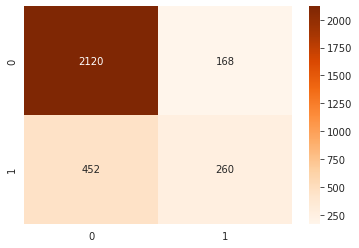

In [ ]:
# your code here
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.4g');

### 5. Logistic Regression with Standardisation and Cross Validation

Try to improve the previous model under point 4 (with `oe_salary`) using standardisation. 

#### 5.1. Standardize only these numerical features: `satisfaction_level`, `last_evaluation`, `number_project`, `average_monthly_hours`, `time_spent_company`, `eval_spent`, so that each have a mean of zero and a standard deviation of 1. You can use the Scikit-learn `StandardScaler` function.
> Hint: remember to use only the training set for fiting the StandardScaler, then apply the scaler (transform) to both the train and test sets.
>
> Hint 2: X shoud contain the following 19 features 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'eval_spent','work_accident',
       'promotion_last_5years', ('IT',), ('RandD',), ('accounting',),
       ('hr',), ('management',), ('marketing',), ('product_mng',),
       ('sales',), ('support',), ('technical',), 'oe_salary'.


In [ ]:
# your code here
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spent_company', 'eval_spent','work_accident', 'promotion_last_5years', ('IT',), ('RandD',), ('accounting',), ('hr',), ('management',), ('marketing',), ('product_mng',), ('sales',), ('support',), ('technical',), 0]].values
y = df["left"].values

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


#### 5.2. Training

Train a Logistic Regression model with Cross Validation on the pre-processed dataset to which you applied standardisation. Use the same parameters for LogisticRegressionCV as before. These are copied below.

`LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)`



In [ ]:
# your code here
LR_cv = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)
LR_cv.fit(X_train, y_train)

def evaluate(true, pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[2120  168]
 [ 452  260]]
ACCURACY SCORE:
0.7933
CLASSIFICATION REPORT:
	Precision: 0.6075
	Recall: 0.3652
	F1_Score: 0.4561


#### 5.3. What is the test accuracy? What is the train accuracy?

In [ ]:
# your code here
LR.score(X_train, y_train)

0.7617301441786816

In [ ]:
# store the test accuracy for later
accuracy3=LR.score(X_test, y_test)
accuracy3

0.7626666666666667

#### 5.4. Calculate the precision and recall on the test set.

In [ ]:
# your code here
y_pred = LR_cv.predict(X_test)

def evaluate(true, pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[2110  178]
 [ 360  352]]
ACCURACY SCORE:
0.8207
CLASSIFICATION REPORT:
	Precision: 0.6642
	Recall: 0.4944
	F1_Score: 0.5668


#### 5.5. Show the confusion matrix for the test set

In [ ]:
# your code here
def evaluate(true, pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[2110  178]
 [ 360  352]]


#### 5.6. Plot the confusion matrix

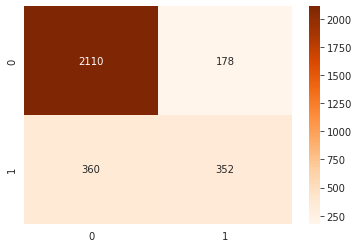

In [ ]:
# your code here
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.4g');

#### 5.7. Use the logistic regression model with standardisation and cross validation to predict whether a employee with the following characteristics will stay on the job or leave:

> An employee from the sales department, low salary, satisfaction 0.43, last evaluation 0.97, involved in 6 projects, working 284 monthly hours, 4 years spent with the company, 0 work accident and 0 promotions in the last 5 years.

In [ ]:
# these are the X-values for which you should make the prediction
X_new = pd.DataFrame({'satisfaction_level': 0.43, 'last_evaluation': 0.97, 'number_project': 6,
       'average_monthly_hours': 284, 'time_spent_company': 4, 'eval_spent': 3.88, 
       'work_accident': 0, 'promotion_last_5years': 0, ('IT',): 0, ('RandD',): 0, ('accounting',): 0,
       ('hr',): 0, ('management',): 0, ('marketing',): 0, ('product_mng',): 0,
       ('sales',): 1, ('support',): 0, ('technical',): 0, 'salary_encoded': 0}, index=[0])
X_new

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,eval_spent,work_accident,promotion_last_5years,"(IT,)","(RandD,)","(accounting,)","(hr,)","(management,)","(marketing,)","(product_mng,)","(sales,)","(support,)","(technical,)",salary_encoded
0,0.43,0.97,6,284,4,3.88,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# your code here


### 6. KNN with standardisation

#### 6.1. Train a model using a K-Nearest Neighbours (KNN) algorithm, setting `knn = KNeighborsClassifier(n_neighbors=2)`. Use the same features as in the previous model (`oe_salary`) and standardisation.

> Hint: X shoud contain the following 19 features 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'eval_spent','work_accident',
       'promotion_last_5years', ('IT',), ('RandD',), ('accounting',),
       ('hr',), ('management',), ('marketing',), ('product_mng',),
       ('sales',), ('support',), ('technical',), 'oe_salary'.

In [ ]:
# your code here
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spent_company', 'eval_spent','work_accident', 'promotion_last_5years', ('IT',), ('RandD',), ('accounting',), ('hr',), ('management',), ('marketing',), ('product_mng',), ('sales',), ('support',), ('technical',), 0]].values
y = df["left"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

LR_cv = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, random_state=72)
LR_cv.fit(X_train, y_train)

y_pred = LR_cv.predict(X_test)

def evaluate(true, pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

evaluate(y_test, y_pred)




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


CONFUSION MATRIX:
[[2110  178]
 [ 360  352]]
ACCURACY SCORE:
0.8207
CLASSIFICATION REPORT:
	Precision: 0.6642
	Recall: 0.4944
	F1_Score: 0.5668


#### 6.2. What is the train and test accuracy?

In [ ]:
# your code here
LR_cv.score(X_test, y_test)

0.8206666666666667

In [ ]:

LR_cv.score(X_train, y_train)

0.8212351029252438

In [ ]:
# store the test-accuracy for later
accuracy4=LR_cv.score(X_test, y_test)

#### 6.3. What is the precision and recall?

In [ ]:
# your code here
def evaluate(true, pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"CLASSIFICATION REPORT:\nPrecision: {precision:.4f}\nRecall: {recall:.4f}")

evaluate(y_test, y_pred)


CLASSIFICATION REPORT:
Precision: 0.6642
Recall: 0.4944


#### 6.4. Print and plot the confusion matrix

CONFUSION MATRIX:
[[2110  178]
 [ 360  352]]


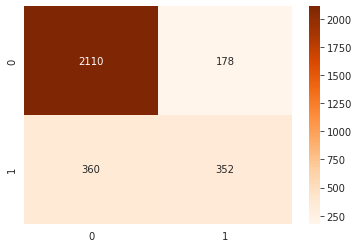

In [ ]:
# your code here
def evaluate(true, pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")

evaluate(y_test, y_pred)

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.4g');


#### 6.5. Use the K-Nearest Neighbours (KNN) model trained above to predict whether a employee with the characteristics outilined below will stay on the job. This is the same employee as before under point 5.7.

> An employee from the sales department, low salary, satisfaction 0.43, last evaluation 0.97, involved in 6 projects, working 284 monthly hours, 4 years spent with the company, 0 work accident and 0 promotions in the last 5 years. (same as before)
>
> Hint: do not forget to apply standardisation to the data for the new employee for which you want to make the prediction.

In [ ]:
# these are the X-values for which you should make the prediction
X_new = pd.DataFrame({'satisfaction_level': 0.43, 'last_evaluation': 0.97, 'number_project': 6,
       'average_monthly_hours': 284, 'time_spent_company': 4, 'eval_spent': 3.88, 
       'work_accident': 0, 'promotion_last_5years': 0, ('IT',): 0, ('RandD',): 0, ('accounting',): 0,
       ('hr',): 0, ('management',): 0, ('marketing',): 0, ('product_mng',): 0,
       ('sales',): 1, ('support',): 0, ('technical',): 0, 'salary_encoded': 0}, index=[0])
X_new

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,eval_spent,work_accident,promotion_last_5years,"(IT,)","(RandD,)","(accounting,)","(hr,)","(management,)","(marketing,)","(product_mng,)","(sales,)","(support,)","(technical,)",salary_encoded
0,0.43,0.97,6,284,4,3.88,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# your code here


### 7. Decision Tree Classifier and Standardisation

#### 7.1. Use the same features as before (with `oe_salary`) and standardisation to train your model of emloyee retention. Use the following parameters for your decision tree: `DecisionTreeClassifier(max_depth=7, random_state=72)`

> Hint: X should have a total of 19 features, namely: 'satisfaction_level', 'last_evaluation',            'number_project', 'average_monthly_hours',           'time_spent_company',         'work_accident',       'promotion_last_5years',                 ('IT',),                   ('RandD',),         ('accounting',), ('hr',),         ('management',),  ('marketing',), ('product_mng',), ('sales',),            ('support',), ('technical',), 'le_salary', 'eval_spent'.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=7, random_state=72)

In [ ]:
# your code here
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spent_company', 'work_accident', 'promotion_last_5years', ('IT',), ('RandD',), ('accounting',), ('hr',), ('management',), ('marketing',), ('product_mng',), ('sales',), ('support',), ('technical',), 0, 'eval_spent']].values
y = df["left"].values

tree = DecisionTreeClassifier()
tree.fit(X, y)
tree.score(X, y)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


1.0

#### 7.2. Calculate the test and train accuracy.

In [ ]:
# your code here
LR_cv.score(X_test, y_test)
LR_cv.score(X_train, y_train)

0.8212351029252438

In [ ]:
# store for the test-accuracy for later
accuracy5=LR_cv.score(X_test, y_test)

#### 7.3. Calculate precision and recall on the test set

In [ ]:
# your code here
y_pred = LR_cv.predict(X_test)

def evaluate(true, pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"CLASSIFICATION REPORT:\nPrecision: {precision:.4f}\nRecall: {recall:.4f}")

evaluate(y_test, y_pred)

CLASSIFICATION REPORT:
Precision: 0.6642
Recall: 0.4944


#### 7.4. Plot the confusion matrix

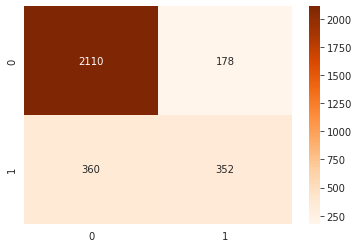

In [ ]:
# your code here
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='Oranges', fmt='.4g');

### 8. Accuracy improvement

Generate a plot with the different test accuracy scores obtained for the different models trained and including the base rate you calculated in the beginning.

In [ ]:
# your code here
dfAccu=['accuracy1', 'accuracy2', 'accuracy3', 'accuracy4', 'accuracy5']
dfAccu

['accuracy1', 'accuracy2', 'accuracy3', 'accuracy4', 'accuracy5']